# Variation in Blocking Probability for Different Coverage Conditions



* In this notebook, we compute the `blocking probability` as a function of `AL probability distribution of UEs`.
* One can find how ALs are distributed in a CORESET by performing PDCCH link level performance with different ALs or system level simulations to determine SINR distribution of UEs.
* In fact, suitable ALs are used for UEs to meet suitable PDCCH performance requirements.
____________________________________________________________________________________________________________________

* We consider 3 scenarios corresponding to `Good`, `Medium` and `Poor` coverage for evaluation.
    * **Good Coverage** : Most of the UEs are in good coverage and require low ALs (i.e., ALs 1 and 2), with AL               distribution [0.5, 0.4, 0.07, 0.02, 0.01]
    * **Medium Coverage** : Most of the UEs are in medium coverage and require medium ALs (i.e., AL 4), with AL               distribution [0.05, 0.2, 0.5, 0.2, 0.05]
    * **Extreme Coverage** : Most of the UEs are in poor coverage and require high ALs (i.e., ALs 8 and 16), with AL           distribution [0.01, 0.02, 0.07, 0.4, 0.5]
    
    
    
* The CORESET size `Nccep` is 54 CCEs for this simulation.

## Import Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

import numpy      as np

## Import 5G Toolkit Libraries

In [2]:
import sys
sys.path.append("../../")
from toolkit5G.Scheduler import PDCCHScheduler

## Simulation Parameters
The following parameters are used for this simulation:
- `coresetID` denotes the coreset ID.
- `slotNumber` denotes the slot-number carrying the PDCCH.
- `searchSpaceType` denotes the search space type. UE specific search space (USS) or Common search space (CSS).
- `nci` denotes the variable corresponding to carrier aggregation. Current simulation does not assume carrier aggregation.

In [3]:
mu                = np.random.randint(4)    # numerlogy for sub-carrier spacing
numSlotsPerFrame  = 2**mu * 10              # number of slots per radio frame
coresetID         = 1                       # coreset ID
slotNumber        = 0               
searchSpaceType   = "USS"                   # search space type. UE specific search space
nci               = 0                       # variable corresponding to carrier aggregation 

## PDCCH Scheduling Parameters
Following parameters are crucial for PDCCH scheduling performance:
- ``Nccep`` denotes coreset size or number of CCEs available for scheduling UEs.
- ``strategy`` denotes the scheduling strategy.
- ``numCandidates`` denotes number of PDCCH candidates per each Aggregation Level.

In [4]:
Nccep             = 54
maxNumUEs         = 40
numUEs            = np.arange(0,maxNumUEs+1,4)
numUEs[0]         = 1
numIterations     = 100
numCandidates     = np.array([6,6,4,2,1], dtype=int)
strategy          = "Conservative" 
pdcchSchedulerObj = PDCCHScheduler(mu,slotNumber, coresetID, nci)

## PDCCH Scheduling for ``Good Coverage`` Scenarios

- The characteristics of good coverage is parameterized by ``aggLevelProbDistributionForGoodCoverage``.
- Simulation outcome (**blockage probability**) parameterized by ``probOfBlockingForGoodCoverage``.
- Scenario where the SNR/SINR is good enough, so that a `lower` AL (i.e., AL of 1 and 2) is choosen by the             scheduler.

In [5]:
################
# Good Coverage
################
aggLevelProbDistributionForGoodCoverage = np.array([0.5, 0.4, 0.07, 0.02, 0.01])
probOfBlockingForGoodCoverage = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForGoodCoverage)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForGoodCoverage[n] = prob/numIterations

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40


## PDCCH Scheduling for ``Medium Coverage`` Scenarios

- The characteristics of medium coverage is parameterized by ``aggLevelProbDistributionForMediumCoverage``.
- Simulation outcome (**blockage probability**) parameterized by ``probOfBlockingForMediumCoverage``.
- Scenario where the SNR/SINR is not good enough or medium, so that a `medium` AL (i.e., AL of 4) is choosen by the     scheduler.


In [6]:
##################
# Medium Coverage
##################
aggLevelProbDistributionForMediumCoverage = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
probOfBlockingForMediumCoverage = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForMediumCoverage)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForMediumCoverage[n] = prob/numIterations

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40


## PDCCH Scheduling for ``Extreme Coverage`` Scenarios

- The characteristics of extreme coverage is parameterized by ``aggLevelProbDistributionForExtremeCoverage``.
- Simulation outcome (**blockage probability**) parameterized by ``probOfBlockingForExtremeCoverage``.
- Scenario where the SNR/SINR is extreme or poor, so that a higher AL (i.e., AL of 8 and 16) is choosen by the         scheduler.

In [7]:
################
# Extreme Coverage
################
aggLevelProbDistributionForExtremeCoverage = np.array([0.01, 0.02, 0.07, 0.4, 0.5])
probOfBlockingForExtremeCoverage = np.zeros(numUEs.shape)

for n in range(numUEs.size):
    print("Simulating (n,numUEs) : "+str(n)+", "+str(numUEs[n]))
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs[n], aggLevelProbDistributionForExtremeCoverage)
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs[n],), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs[n]
    probOfBlockingForExtremeCoverage[n] = prob/numIterations

Simulating (n,numUEs) : 0, 1
Simulating (n,numUEs) : 1, 4
Simulating (n,numUEs) : 2, 8
Simulating (n,numUEs) : 3, 12
Simulating (n,numUEs) : 4, 16
Simulating (n,numUEs) : 5, 20
Simulating (n,numUEs) : 6, 24
Simulating (n,numUEs) : 7, 28
Simulating (n,numUEs) : 8, 32
Simulating (n,numUEs) : 9, 36
Simulating (n,numUEs) : 10, 40


## Plotting the results
The following results clearly demonstrates the improvement in blocking probability with improvement in coverage.
- For 10 UEs, **Medium coverage** and **Good coverage** experiences ~25%, 70% improvement in performance in comparison to **Extreme coverage**.
- For 20 UEs, **Medium coverage** and **Good coverage** experiences ~25%, 60% improvement in performance in comparison to **Extreme coverage**.
- For 40 UEs, **Medium coverage** and **Good coverage** experiences ~40%, 45% improvement in performance in comparison to **Extreme coverage**.

Its the recreation of ``Fig. 8. Blocking probability for different AL distributions.`` from the paper referenced below.

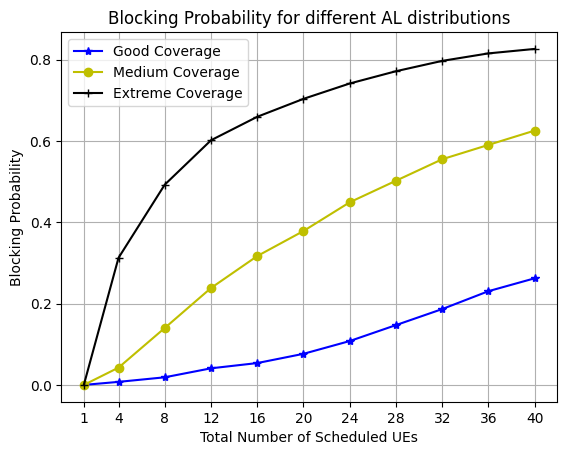

In [8]:
fig, ax = plt.subplots()
ax.plot(numUEs, probOfBlockingForGoodCoverage,    marker  = "*", linestyle = "solid", ms = 6, c = 'b', label = "Good Coverage")
ax.plot(numUEs, probOfBlockingForMediumCoverage,  marker  = "o", linestyle = "solid", ms = 6, c = 'y', label = "Medium Coverage")
ax.plot(numUEs, probOfBlockingForExtremeCoverage, marker  = "+", linestyle = "solid", ms = 6, c = 'k', label = "Extreme Coverage")

ax.legend()
ax.set_xlabel('Total Number of Scheduled UEs')
ax.set_ylabel('Blocking Probability')
ax.set_title('Blocking Probability for different AL distributions', fontsize=12) 
ax.set_xticks(numUEs)
ax.grid()
plt.show()

### References

[1] `Blocking Probability Analysis for 5G New Radio (NR) Physical Downlink Control Channel`. Mohammad Mozaffari,
      Y.-P. Eric Wang, and Kittipong Kittichokechai